# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Rare Sneaker Prices


**Harvard University**<br/>
**Fall 2021**<br/>
**Students**: Tyler Barnett, Weston Ruths, Pragya Tooteja, Kishan Venkataramu

<hr style="height:2pt">



In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)

  
  

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

In [3]:
data = pd.read_csv("data/StockX-Data.csv")
np.random.seed(121)

# Convert dates to ordinals
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'] = data['Order Date'].map(dt.datetime.toordinal)

data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Release Date'] = data['Release Date'].map(dt.datetime.toordinal)

# Convert Brand to categorical variable
cat_type = CategoricalDtype(ordered=False)
data['Brand'] = data['Brand'].astype(cat_type)

data_train, data_test = train_test_split(
    data,
    test_size=0.2,
    random_state=121,
    shuffle=True,
)

print(data.shape)
print(data_train.shape, data_test.shape)

(99956, 8)
(79964, 8) (19992, 8)


In [4]:
data.dtypes

Order Date         int64
Brand           category
Sneaker Name      object
Sale Price        object
Retail Price      object
Release Date       int64
Shoe Size        float64
Buyer Region      object
dtype: object

In [5]:
data_train.head()

Order Date      Brand                                 Sneaker Name  \
63326      737019      Yeezy             Adidas-Yeezy-Boost-350-V2-Sesame   
80294      737054  Off-White          Nike-Air-Force-1-Low-Off-White-Volt   
85113      737062      Yeezy  adidas-Yeezy-Boost-350-V2-Static-Reflective   
43216      736915  Off-White         Nike-Air-Presto-Off-White-White-2018   
96466      737096      Yeezy             adidas-Yeezy-Boost-350-V2-Static   

      Sale Price Retail Price  Release Date  Shoe Size   Buyer Region  
63326       $325         $220        737021       12.5     California  
80294       $374         $170        737047        9.0     California  
85113       $399         $220        737054        8.5  Massachusetts  
43216       $657         $160        736909       10.0          Texas  
96466       $330         $220        737055        7.0       New York

(array([16234.,  7333.,  6374., 10317., 15121.,  9074.,   800.,  2143.,
        30357.,  2203.]),
 array([   0. ,  148.8,  297.6,  446.4,  595.2,  744. ,  892.8, 1041.6,
        1190.4, 1339.2, 1488. ]),
 <BarContainer object of 10 artists>)

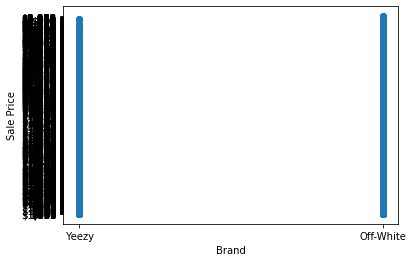

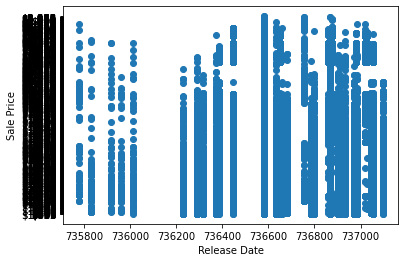

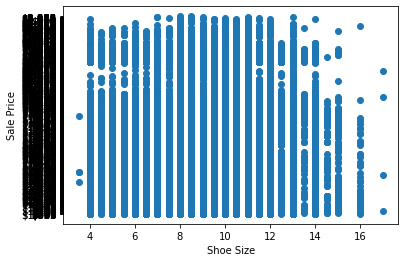

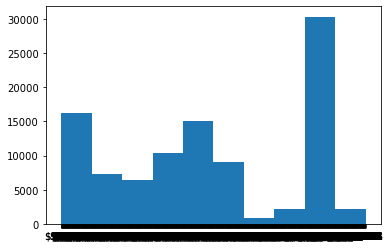

In [6]:
attr_list = [
    "Order Date",
    "Brand",
    "Sneaker Name",
    "Sale Price",
    "Retail Price",
    "Release Date",
    "Shoe Size",
    "Buyer Region"
]

plt.scatter(data['Brand'], data['Sale Price'])
plt.xlabel('Brand')
plt.ylabel('Sale Price')

plt.figure()

plt.scatter(data['Release Date'], data['Sale Price'])
plt.xlabel('Release Date')
plt.ylabel('Sale Price')

plt.figure()
plt.scatter(data['Shoe Size'], data['Sale Price'])
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price')

plt.figure()
plt.hist(data['Sale Price'])


<a id="intro"></a>

## Baseline Model

[Return to contents](#contents)

In [7]:
# Split dataframe into X and y numpy arrays
X_train = data_train.iloc[:, data_train.columns != "Sale Price"].values
y_train = data_train["Sale Price"].values
X_test = data_test.iloc[:, data_test.columns != "Sale Price"].values
y_test = data_test["Sale Price"].values

In [8]:
train_scores = {}
cvmeans = {}
cvstds = {}

tree_depth_start, tree_depth_end = 1, 20
for i in range(tree_depth_start, tree_depth_end + 1):
    
    #declare tree model object
    model = DecisionTreeClassifier(max_depth=i)
    
    #fit the decision tree to the entire training set
    model.fit(X_train, y_train)
    
    #Evaluate on the entire training set (i.e., .score(...)), while storing the scores in a variable named train_scores.
    train_scores[i] = model.score(X_train, y_train)
    
    #get cv metrics
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, n_jobs=-1)
    cvmeans[i] = scores.mean()
    cvstds[i] = np.std(scores)

ValueError: could not convert string to float: ' Yeezy'

#### THE END

[Return to contents](#contents)